## 深入浅出pandas-2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'].insert(0, 'SimHei')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
%config InlineBackend.figure_format = 'svg'

### 数据透视

1. 数据聚合（指标统计）
2. 排序和头部值
3. 透视表和交叉表

In [3]:
sales_df = pd.read_excel('res/2020年销售数据.xlsx', sheet_name='data')
sales_df.head(5)

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量,直接成本
0,2020-01-01,上海,拼多多,182894-455,八匹马,99,83,3351
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29,1016
2,2020-01-01,上海,天猫,205654-021,八匹马,169,85,6320
3,2020-01-01,上海,天猫,205654-519,八匹马,169,14,485
4,2020-01-01,上海,天猫,377781-010,皮皮虾,249,61,2452


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   销售日期    1945 non-null   datetime64[ns]
 1   销售区域    1945 non-null   object        
 2   销售渠道    1945 non-null   object        
 3   销售订单    1945 non-null   object        
 4   品牌      1945 non-null   object        
 5   售价      1945 non-null   int64         
 6   销售数量    1945 non-null   int64         
 7   直接成本    1945 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 121.7+ KB


In [5]:
# 添加销售额、毛利润、月份列
sales_df['销售额'] = sales_df.售价 * sales_df.销售数量
sales_df['毛利润'] = sales_df.销售额 - sales_df.直接成本
sales_df['月份'] = sales_df.销售日期.dt.month
sales_df.head(5)

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量,直接成本,销售额,毛利润,月份
0,2020-01-01,上海,拼多多,182894-455,八匹马,99,83,3351,8217,4866,1
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29,1016,6351,5335,1
2,2020-01-01,上海,天猫,205654-021,八匹马,169,85,6320,14365,8045,1
3,2020-01-01,上海,天猫,205654-519,八匹马,169,14,485,2366,1881,1
4,2020-01-01,上海,天猫,377781-010,皮皮虾,249,61,2452,15189,12737,1


In [6]:
def make_tag(price):
    if price < 300:
        return '低端'
    elif price < 800:
        return '中端'
    return '高端'

In [7]:
# 根据商品的价格添加价位标签
sales_df['价位'] = sales_df.售价.apply(make_tag)
sales_df.head(5)

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量,直接成本,销售额,毛利润,月份,价位
0,2020-01-01,上海,拼多多,182894-455,八匹马,99,83,3351,8217,4866,1,低端
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29,1016,6351,5335,1,低端
2,2020-01-01,上海,天猫,205654-021,八匹马,169,85,6320,14365,8045,1,低端
3,2020-01-01,上海,天猫,205654-519,八匹马,169,14,485,2366,1881,1,低端
4,2020-01-01,上海,天猫,377781-010,皮皮虾,249,61,2452,15189,12737,1,低端


In [8]:
# 统计北极星指标
GMV, profit, quantity = sales_df[['销售额', '毛利润', '销售数量']].sum()
print(f'销售额: {GMV}元')
print(f'毛利润: {profit}元')
print(f'销售数量: {quantity}件')
print(f'毛利率: {profit / GMV:.2%}')

销售额: 39772087元
毛利润: 27926715元
销售数量: 107403件
毛利率: 70.22%


In [9]:
# 统计每个月的销售额和毛利润
temp1 = sales_df.groupby('月份')[['销售额', '毛利润']].agg('sum')
temp1

,销售额,毛利润
月份,,
1,5409855,3845162
2,4608455,3190039
3,4164972,2934584
4,3996770,2882592
5,3239005,2272902
6,2817936,1897643
7,3501304,2449313
8,2948189,2071782
9,2632960,1849277


In [10]:
# 使用透视表统计每个月的销售额和毛利润
pd.pivot_table(
    sales_df,
    index='月份',
    values=['销售额', '毛利润'],
    aggfunc='sum'
)

,毛利润,销售额
月份,,
1,3845162,5409855
2,3190039,4608455
3,2934584,4164972
4,2882592,3996770
5,2272902,3239005
6,1897643,2817936
7,2449313,3501304
8,2071782,2948189
9,1849277,2632960


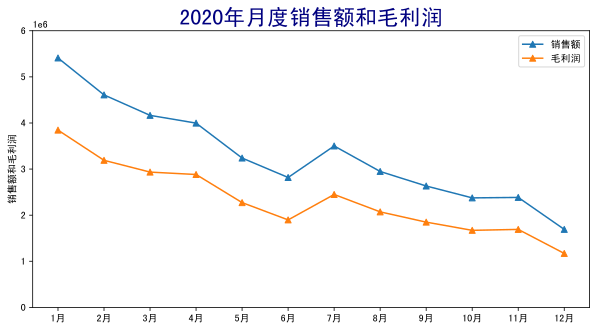

In [11]:
# 绘制折线图
temp1.plot(
    kind='line',
    figsize=(10, 5),
    y=['销售额', '毛利润'],   # 放到纵轴上的数据
    xlabel='',              # 横轴的标签
    ylabel='销售额和毛利润',  # 纵轴的标签
    marker='^',             # 标记点符号
)
# plt.fill_between(np.arange(1, 13), temp1.销售额, where=temp1.销售额 >= 3e6, facecolor='red', alpha=0.25)
# plt.fill_between(np.arange(1, 13), temp1.销售额, where=temp1.销售额 < 3e6, facecolor='green', alpha=0.25)
# 定制纵轴的取值范围
plt.ylim(0, 6e6)
# 定制横轴的刻度
plt.xticks(np.arange(1, 13), labels=[f'{x}月' for x in range(1, 13)])
# 定制标题
plt.title('2020年月度销售额和毛利润', fontdict={'fontsize': 22, 'color': 'navy'})
plt.show()

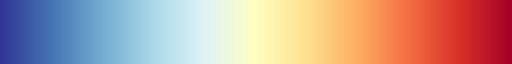

In [12]:
plt.cm.RdYlBu_r

In [13]:
# 计算月环比
temp1['销售额月环比'] = temp1.销售额.pct_change()
temp1['毛利润月环比'] = temp1.毛利润.pct_change()
# 索引重排序
temp1 = temp1.reindex(columns=['销售额', '销售额月环比', '毛利润', '毛利润月环比'])
# 渲染输出
temp1.style.format(
    formatter={
        '销售额月环比': '{:.2%}',
        '毛利润月环比': '{:.2%}'
    },
    na_rep='-------'
).background_gradient(
    'RdYlBu_r',
    subset=['销售额月环比', '毛利润月环比']
)

,销售额,销售额月环比,毛利润,毛利润月环比
月份,,,,
1,5409855,-------,3845162,-------
2,4608455,-14.81%,3190039,-17.04%
3,4164972,-9.62%,2934584,-8.01%
4,3996770,-4.04%,2882592,-1.77%
5,3239005,-18.96%,2272902,-21.15%
6,2817936,-13.00%,1897643,-16.51%
7,3501304,24.25%,2449313,29.07%
8,2948189,-15.80%,2071782,-15.41%
9,2632960,-10.69%,1849277,-10.74%


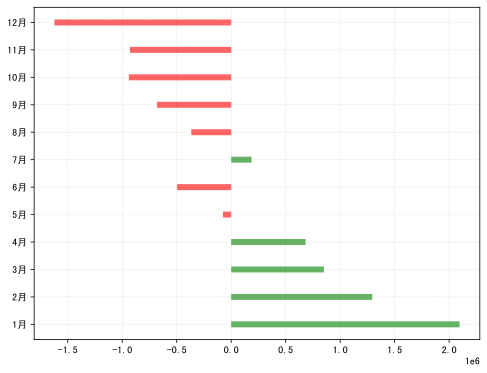

In [14]:
# 绘制横线图
mu = temp1.销售额.mean()
temp1['diff'] = temp1.销售额 - mu
temp1['colors'] = temp1.销售额.map(lambda x: 'green' if x > mu else 'red')

plt.figure(figsize=(8, 6), dpi=200)
plt.hlines(y=temp1.index, xmin=0, xmax=temp1['diff'], color=temp1.colors, alpha=0.6, linewidth=6)
plt.yticks(np.arange(1, 13), labels=[f'{x}月' for x in np.arange(1, 13)])
# 定制网格线
plt.grid(linestyle='--', linewidth=0.4, alpha=0.5)
plt.show()

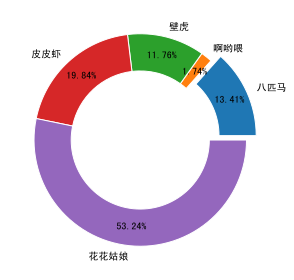

In [15]:
# 各品牌对销售额贡献占比
temp2 = sales_df.groupby('品牌')['销售额'].sum()
temp2.plot(
    kind='pie',
    ylabel='',
    autopct='%.2f%%',  # 自动计算并显示百分比
    pctdistance=0.82,  # 百分比标签到圆心的距离
    wedgeprops=dict(width=0.35, edgecolor='w'),  # 定制环状饼图
    explode=[0.1, 0, 0, 0, 0],  # 分离饼图
)
plt.show()

In [16]:
# 各销售区域每个月的销售额
temp3 = sales_df.groupby(['销售区域', '月份'], as_index=False)[['销售额']].sum()
# pivot - 将行旋转到列上（窄表 ----> 宽表）
# melt - 将列旋转到行上（宽表 ----> 窄表）
temp3.pivot(index='销售区域', columns='月份', values='销售额').fillna(0).astype('i8')

月份,1,2,3,4,5,6,7,8,9,10,11,12
销售区域,,,,,,,,,,,,
上海,1679125,1689527,1061193,1082187,841199,785404,863906,734937,1107693,412108,825169,528041
北京,1878234,1807787,1360666,1205989,807300,1216432,1219083,645727,390077,671608,678668,596146
安徽,0,0,0,341308,554155,0,0,0,0,0,0,0
广东,0,0,388180,0,0,0,0,469390,365191,0,395188,0
江苏,0,0,0,537079,0,0,841032,0,0,710962,0,215307
浙江,0,0,248354,0,0,0,0,439508,0,0,0,0
福建,1852496,1111141,1106579,830207,1036351,816100,577283,658627,769999,580707,486258,352479


In [17]:
# 创建透视表
pd.pivot_table(
    sales_df,
    index='销售区域',
    columns='月份',
    values='销售额',
    aggfunc='sum',
    fill_value=0,
    margins=True,
    margins_name='总计'
)

月份,1,2,3,4,5,6,7,8,9,10,11,12,总计
销售区域,,,,,,,,,,,,,
上海,1679125,1689527,1061193,1082187,841199,785404,863906,734937,1107693,412108,825169,528041,11610489
北京,1878234,1807787,1360666,1205989,807300,1216432,1219083,645727,390077,671608,678668,596146,12477717
安徽,0,0,0,341308,554155,0,0,0,0,0,0,0,895463
广东,0,0,388180,0,0,0,0,469390,365191,0,395188,0,1617949
江苏,0,0,0,537079,0,0,841032,0,0,710962,0,215307,2304380
浙江,0,0,248354,0,0,0,0,439508,0,0,0,0,687862
福建,1852496,1111141,1106579,830207,1036351,816100,577283,658627,769999,580707,486258,352479,10178227
总计,5409855,4608455,4164972,3996770,3239005,2817936,3501304,2948189,2632960,2375385,2385283,1691973,39772087


In [18]:
# 将价位字段处理成category类型并指定排序的顺序
sales_df['价位'] = sales_df.价位.astype('category').cat.reorder_categories(['高端', '中端', '低端'])
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   销售日期    1945 non-null   datetime64[ns]
 1   销售区域    1945 non-null   object        
 2   销售渠道    1945 non-null   object        
 3   销售订单    1945 non-null   object        
 4   品牌      1945 non-null   object        
 5   售价      1945 non-null   int64         
 6   销售数量    1945 non-null   int64         
 7   直接成本    1945 non-null   int64         
 8   销售额     1945 non-null   int64         
 9   毛利润     1945 non-null   int64         
 10  月份      1945 non-null   int32         
 11  价位      1945 non-null   category      
dtypes: category(1), datetime64[ns](1), int32(1), int64(5), object(4)
memory usage: 161.7+ KB


In [19]:
# 统计每个月各种价位产品的销量
temp4 = sales_df.pivot_table(
    index='价位',
    columns='月份',
    values='销售数量',
    observed=False,
    fill_value=0,
    aggfunc='sum'
)
temp4

月份,1,2,3,4,5,6,7,8,9,10,11,12
价位,,,,,,,,,,,,
高端,1157,897,642,685,490,378,541,528,210,113,93,127
中端,6518,4963,5469,5155,4170,3679,4361,3680,3412,3104,3225,2048
低端,5220,5525,5127,4430,4625,3947,4184,3233,3618,4008,4199,3642


In [20]:
# 交叉表
pd.crosstab(
    index=sales_df.价位,
    columns=sales_df.月份,
    values=sales_df.销售数量,
    aggfunc='sum'
)

月份,1,2,3,4,5,6,7,8,9,10,11,12
价位,,,,,,,,,,,,
高端,1157,897,642,685,490,378,541,528,210,113,93,127
中端,6518,4963,5469,5155,4170,3679,4361,3680,3412,3104,3225,2048
低端,5220,5525,5127,4430,4625,3947,4184,3233,3618,4008,4199,3642


In [21]:
blood_types = np.array(['B', 'A', 'O', 'O', 'AB', 'B', 'O', 'B', 'AB', 'A', 'A', 'O', 'B', 'O', 'O', 'O', 'O', 'A', 'B', 'B'])
personality_types = np.array(['𝛃', '𝛂', '𝛂', '𝛂', '𝛃', '𝛂', '𝛄', '𝛄', '𝛂', '𝛄', '𝛃', '𝛂', '𝛂', '𝛂', '𝛄', '𝛄', '𝛂', '𝛂', '𝛂', '𝛂'])

# 创建交叉表
pd.crosstab(
    index=blood_types,
    columns=personality_types,
    rownames=['血型'],
    colnames=['人格'],
)

人格,𝛂,𝛃,𝛄
血型,,,
A,2,1,1
AB,1,1,0
B,4,1,1
O,5,0,3


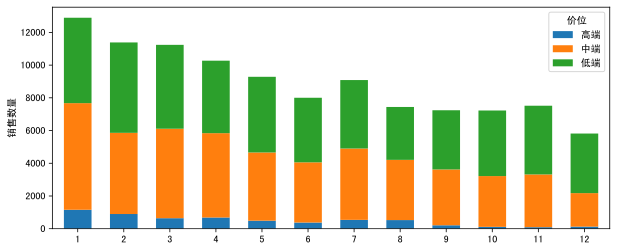

In [22]:
# 绘制堆叠柱状图
temp4.T.plot(
    figsize=(10, 4),
    kind='bar',
    width=0.6,
    xlabel='',
    ylabel='销售数量',
    stacked=True
)
plt.xticks(rotation=0)
plt.show()

In [23]:
# 让每一项数据除以对应月份的销售数量之和
temp5 = temp4.T.divide(temp4.sum(), axis=0)
temp5

价位,高端,中端,低端
月份,,,
1,0.089725,0.505467,0.404808
2,0.078788,0.435924,0.485288
3,0.057128,0.486652,0.456220
4,0.066699,0.501947,0.431353
5,0.052773,0.449111,0.498115
6,0.047226,0.459645,0.493128
7,0.059542,0.479969,0.460489
8,0.070958,0.494557,0.434485
9,0.029006,0.471271,0.499724


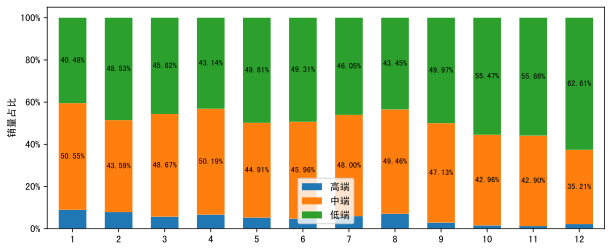

In [24]:
# 绘制百分比堆叠柱状图
temp5.plot(
    figsize=(10, 4),
    kind='bar',
    width=0.6,
    xlabel='',
    ylabel='销量占比',
    stacked=True
)
plt.xticks(rotation=0)
plt.yticks(np.linspace(0, 1, 6), labels=[f'{x:.0%}' for x in np.linspace(0, 1, 6)])
plt.legend(loc='lower center')

for i in temp5.index:
    y1, y2, y3 = temp5.loc[i]
    plt.text(i - 1, y2 / 2 + y1, f'{y2:.2%}', ha='center', va='center', fontdict={'size': 8})
    plt.text(i - 1, y3 / 2 + y2 + y1, f'{y3:.2%}', ha='center', va='center', fontdict={'size': 8})

plt.show()

### 作业：招聘岗位数据分析

1. 统计出城市、招聘信息、招聘岗位的数量和平均月薪。
2. 统计每个城市的岗位数量从高到低排序。
3. 统计每个城市的平均薪资从高到低排序。
4. 统计招聘岗位对学历要求的占比。
5. 统计招聘岗位对工作年限的要求占比。
6. 分析薪资跟学历和工作年限的关系。

In [25]:
jobs_df = pd.read_csv('res/cleaned_jobs.csv')
jobs_df

,company_name,salary,year,edu,job_name,pos_count,salary_lower,salary_upper,city
0,软通动力集团,12.5,1-3年,本科,python开发,2,10,15,成都
1,思湃德,30.0,3-5年,本科,python,5,20,40,成都
2,源码时代,17.5,3-5年,大专,python 讲师,3,15,20,成都
3,三源合众,8.0,1年以内,本科,python,1,6,10,成都
4,软通动力,10.5,1-3年,本科,python开发,3,8,13,成都
...,...,...,...,...,...,...,...,...,...
6482,公众智能,9.0,3-5年,本科,产品经理,2,8,10,西安
6483,微感,9.0,3-5年,大专,产品经理,4,8,10,西安
6484,巴斯光年,15.0,3-5年,本科,产品经理,6,10,20,西安
6485,西大华特科技,6.5,1-3年,研究生,产品经理（农药）,6,5,8,西安


In [26]:
# 统计北极星指标
city_count = jobs_df['city'].nunique()
info_count = jobs_df['company_name'].count()
post_count = jobs_df['pos_count'].sum()
salary_avg = jobs_df['salary'].mean().round(1)
print(f'城市数量: {city_count}')
print(f'信息数量: {info_count}')
print(f'岗位数量: {post_count}')
print(f'平均薪资: {salary_avg}')

城市数量: 9
信息数量: 6487
岗位数量: 22611
平均薪资: 17.0


In [27]:
# 统计每个城市的岗位数量从高到低排序
jobs_df.groupby('city')[['pos_count']].sum().sort_values(by='pos_count', ascending=False)

,pos_count
city,
上海,3158
深圳,3061
北京,3009
杭州,2732
广州,2560
南京,2345
武汉,2031
成都,1913
西安,1802


In [28]:
pd.pivot_table(
    jobs_df,
    index='city',
    values='pos_count',
    aggfunc='sum'
).sort_values(by='pos_count', ascending=False)

,pos_count
city,
上海,3158
深圳,3061
北京,3009
杭州,2732
广州,2560
南京,2345
武汉,2031
成都,1913
西安,1802


In [29]:
jobs_df.groupby('city')[['salary']].mean().round(1).sort_values(by='salary', ascending=False)

,salary
city,
北京,23.6
深圳,20.3
上海,19.8
杭州,18.9
广州,14.4
南京,14.2
成都,12.6
武汉,11.8
西安,10.5


In [30]:
# 统计每个城市的平均薪资从高到低排序
pd.pivot_table(
    jobs_df,
    index='city',
    values='salary',
    aggfunc='mean'
).round(1).sort_values(by='salary', ascending=False)

,salary
city,
北京,23.6
深圳,20.3
上海,19.8
杭州,18.9
广州,14.4
南京,14.2
成都,12.6
武汉,11.8
西安,10.5


In [31]:
jobs_df['edu'] = jobs_df.edu.astype('category').cat.reorder_categories(['学历不限', '大专', '本科', '研究生'])

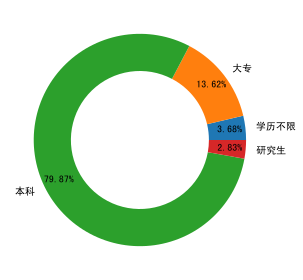

In [32]:
# 统计招聘岗位对学历要求占比
pd.pivot_table(
    jobs_df,
    index='edu',
    values='pos_count',
    aggfunc='sum',
    observed=True
).plot(
    kind='pie',
    ylabel='',
    subplots=True,
    legend=False,
    autopct='%.2f%%',
    pctdistance=0.85,
    wedgeprops={'width': 0.35}
)
plt.show()

In [33]:
jobs_df['year'] = jobs_df.year.astype('category').cat.reorder_categories(['应届生', '1年以内', '经验不限', '1-3年', '3-5年', '5年以上'])

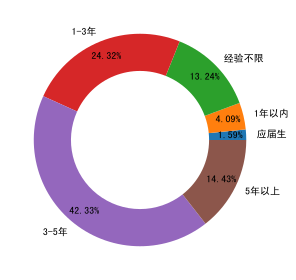

In [34]:
# 统计招聘岗位对工作年限要求绘制饼图
pd.pivot_table(
    jobs_df,
    index='year',
    values='pos_count',
    aggfunc='sum',
    observed=True
).plot(
    kind='pie',
    y='pos_count',
    ylabel='',
    legend=False,
    autopct='%.2f%%',
    pctdistance=0.85,
    wedgeprops={'width': 0.35}
)
plt.show()

In [35]:
# 统计不同学历和工作年限平均薪资
temp6 = pd.pivot_table(
    jobs_df,
    index='edu',
    columns='year',
    values='salary',
    observed=False,
    fill_value=0
).round(1)
temp6

year,应届生,1年以内,经验不限,1-3年,3-5年,5年以上
edu,,,,,,
学历不限,9.2,8.2,10.9,10.9,16.4,21.1
大专,7.2,8.0,8.4,9.4,14.3,22.5
本科,7.3,9.6,13.0,13.2,20.0,25.5
研究生,8.3,12.7,15.2,17.1,24.8,30.5


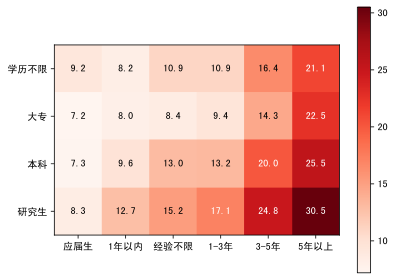

In [36]:
# 绘制热力图
plt.imshow(temp6, cmap='Reds')
plt.xticks(np.arange(6), labels=temp6.columns)
plt.yticks(np.arange(4), labels=temp6.index)

for i in range(temp6.index.size):
    for j in range(temp6.columns.size):
        value = temp6.iat[i, j]
        color = 'w' if value > salary_avg else 'k'
        plt.text(j, i, value, ha='center', va='center', color=color)

# 定制颜色条
plt.colorbar()
plt.show()

In [37]:
# %pip install seaborn

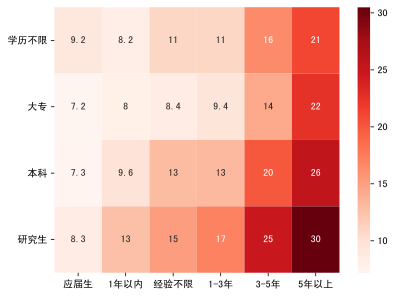

In [38]:
import seaborn as sns

sns.heatmap(temp6, cmap='Reds', annot=True)
plt.xlabel('')
plt.ylabel('')
plt.yticks(rotation=0)
plt.show()